In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor    
import warnings
warnings.simplefilter('ignore')

In [3]:
# Alter Model

# VIF threshold
vif_thresh=5

#test portion of train-test split
test_size=0.5

In [4]:
# Read the csv file into a pandas DataFrame
hpi = pd.read_csv('merged_HPI_edu_tech.csv')
hpi=hpi.dropna(how="any",axis="rows")
hpi=pd.get_dummies(hpi)
hpi=hpi.astype({'FIPS': 'object'})
hpi=hpi.select_dtypes(include=['float64','uint8','int64'])
hpi=hpi.astype(float)
contenders=hpi.columns

contenders
hpi.head()

,HPI_adj,HPI_1990_adj,HPI_2000_adj,Years_Education_Settled,Years_Education_Moved,Moved_Ratio,Moved_Settled_Ratio,Grad_Bach_Ratio,College_Ratio,Grad_Ratio_Moved,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,203.838247,194.395087,144.543667,13.697604,14.587683,0.054519,0.057662,0.500295,0.217078,0.132046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,182.949335,174.473813,129.732463,13.950142,15.808824,0.074000,0.079913,0.726110,0.249640,0.259191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,354.870404,243.996561,147.591076,14.177111,14.081774,0.070142,0.075433,0.480998,0.277416,0.084799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,333.976706,229.633176,138.902296,14.369779,14.643237,0.048643,0.051130,0.503848,0.307421,0.129941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,265.420653,236.416125,147.935758,13.279301,12.323703,0.089348,0.098114,0.709237,0.145243,0.020047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Data preprocessing - eliminate collinear variables by calculating the VIF of each variable and dropping
# any estimators above our threshold
def calculate_vif_(X, thresh=vif_thresh):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
    
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
#             print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True
    
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

X = calculate_vif_(hpi[contenders])

Remaining variables:
Index(['Years_Edu_Moved_Minus_Settled', 'Tech_Employees_Share', 'State_AK',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV',
       'State_WY'],
      dtype='object')


In [6]:
# Assign X (data) and y (target)
X=X.astype(float)
y = hpi["HPI_2000_adj"].values.reshape(-1, 1)

# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=1)
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
lasso_predictions = lasso.predict(X_test_scaled)
lasso_MSE = mean_squared_error(y_test_scaled, predictions)
lasso_r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {lasso_MSE}, R2: {lasso_r2}")

# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)
ridge_MSE = mean_squared_error(y_test_scaled, predictions)
ridge_r2 = ridge.score(X_test_scaled, y_test_scaled)
print(f"MSE: {ridge_MSE}, R2: {ridge_r2}")

# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
elasticnet_predictions = elasticnet.predict(X_test_scaled)
elasticnet_MSE = mean_squared_error(y_test_scaled, predictions)
elasticnet_r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {elasticnet_MSE}, R2: {elasticnet_r2}")

MSE: 0.3907441845747566, R2: 0.5590719727569642
MSE: 0.3907441845747566, R2: 0.5535404683459075
MSE: 0.39074437696745434, R2: 0.5590717556549931
MSE: 0.39074437696745434, R2: 0.5573397176264552


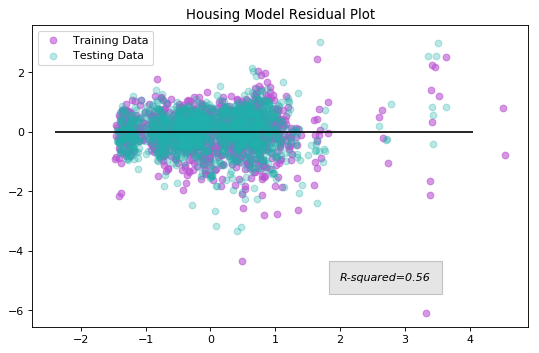

In [8]:
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="mediumorchid", label="Training Data",alpha=0.6)
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="lightseagreen", label="Testing Data",alpha=0.3)
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Housing Model Residual Plot")
# plt.annotate(f"R-squared={r2}",(4,-5))
plt.text(2, -5, f"R-squared={round(r2,2)}", style='italic',
        bbox={'facecolor':'gray', 'alpha':0.2, 'pad':10})
plt.savefig('../../residuals.png')
plt.show()


In [9]:
variables=[]
coefficients=[]
for i in range(0, len(X.columns)):
    variables.append(X.columns[i])
    coefficients.append(model.coef_[0][i])
#     print(f"{X.columns[i]}: {model.coef_[0][i]}")
d = {'Variable':variables,'Coefficient':coefficients}
variable_table = pd.DataFrame(d)
variable_table=variable_table.sort_values("Coefficient",ascending=False)
html=variable_table.to_html()
print(variable_table)

                         Variable  Coefficient
30                       State_ND     0.232749
9                        State_DC     0.127883
13                       State_HI     0.113198
51                       State_WY     0.104344
1            Tech_Employees_Share     0.099126
46                       State_VA     0.071883
0   Years_Edu_Moved_Minus_Settled     0.064092
28                       State_MT     0.052640
6                        State_CA     0.047585
22                       State_MD     0.045477
47                       State_VT     0.040741
48                       State_WA     0.037173
2                        State_AK     0.036795
41                       State_RI     0.036400
33                       State_NJ     0.028113
36                       State_NY     0.021769
39                       State_OR     0.020983
10                       State_DE     0.010941
43                       State_SD     0.010242
21                       State_MA     0.008910
15           

In [10]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(hpi['Tech_Share'], hpi['HPI_adj'])
# ax.set_xlabel('Years_Edu_Moved_Minus_Settled')
# ax.set_ylabel('HPI Adjusted for Inflation')
# plt.show()

cost of living?
take out bottom two quartiles? total pop or share of tech workers?
degree of urbanization?
biotech sector subsector code?
kalamazoo, boise,

In [11]:
for c in contenders:
    print(f"<li>{c}</li>")

<li>HPI_adj</li>
<li>HPI_1990_adj</li>
<li>HPI_2000_adj</li>
<li>Years_Education_Settled</li>
<li>Years_Education_Moved</li>
<li>Moved_Ratio</li>
<li>Moved_Settled_Ratio</li>
<li>Grad_Bach_Ratio</li>
<li>College_Ratio</li>
<li>Grad_Ratio_Moved</li>
<li>Years_Edu_Moved_Minus_Settled</li>
<li>Total_Grad_Ratio</li>
<li>Total_Bach_Ratio</li>
<li>Tech_Establishments_Share</li>
<li>Tech_Employees_Share</li>
<li>State_AK</li>
<li>State_AL</li>
<li>State_AR</li>
<li>State_AZ</li>
<li>State_CA</li>
<li>State_CO</li>
<li>State_CT</li>
<li>State_DC</li>
<li>State_DE</li>
<li>State_FL</li>
<li>State_GA</li>
<li>State_HI</li>
<li>State_IA</li>
<li>State_ID</li>
<li>State_IL</li>
<li>State_IN</li>
<li>State_KS</li>
<li>State_KY</li>
<li>State_LA</li>
<li>State_MA</li>
<li>State_MD</li>
<li>State_ME</li>
<li>State_MI</li>
<li>State_MN</li>
<li>State_MO</li>
<li>State_MS</li>
<li>State_MT</li>
<li>State_NC</li>
<li>State_ND</li>
<li>State_NE</li>
<li>State_NH</li>
<li>State_NJ</li>
<li>State_NM</li>
<

In [13]:
hpi.loc[hpi["FIPS"]==51013]

KeyError: 'FIPS'